# Недообучение и переобучение

# Задание для выполнения

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [146]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


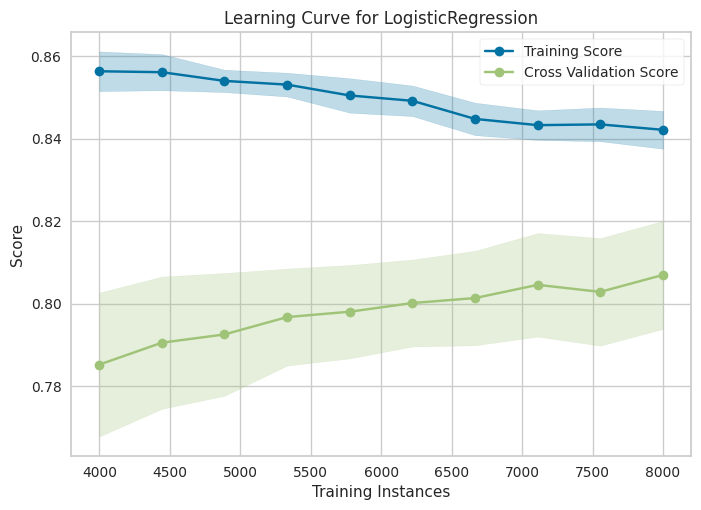

In [147]:
from yellowbrick.model_selection import LearningCurve
plt.rcParams['font.family'] = 'DejaVu Sans'

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [148]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


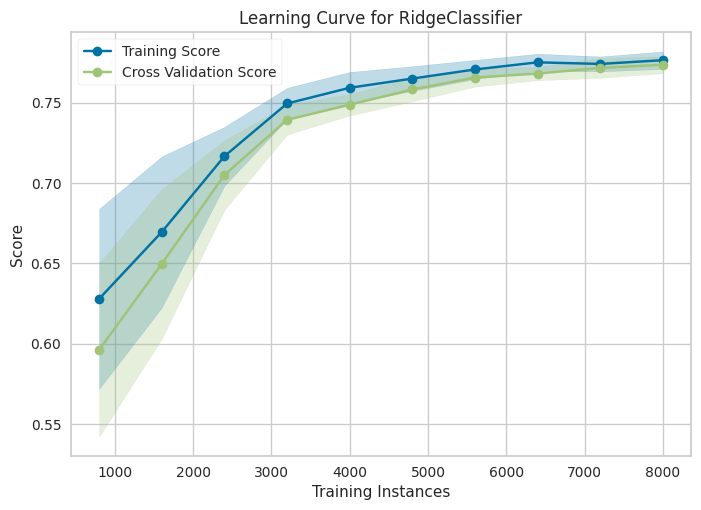

In [149]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

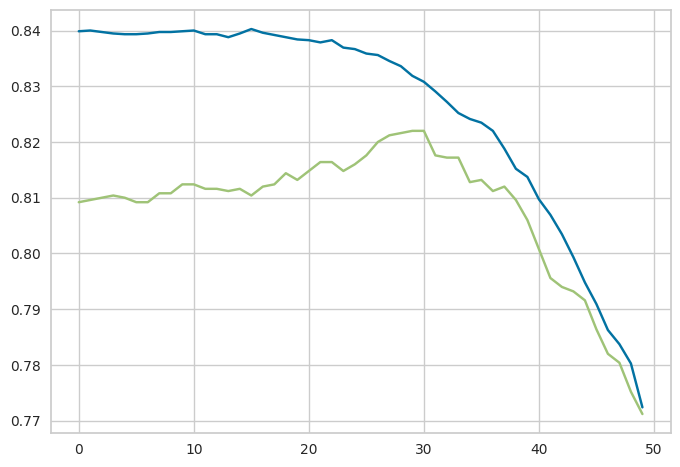

In [150]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [151]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


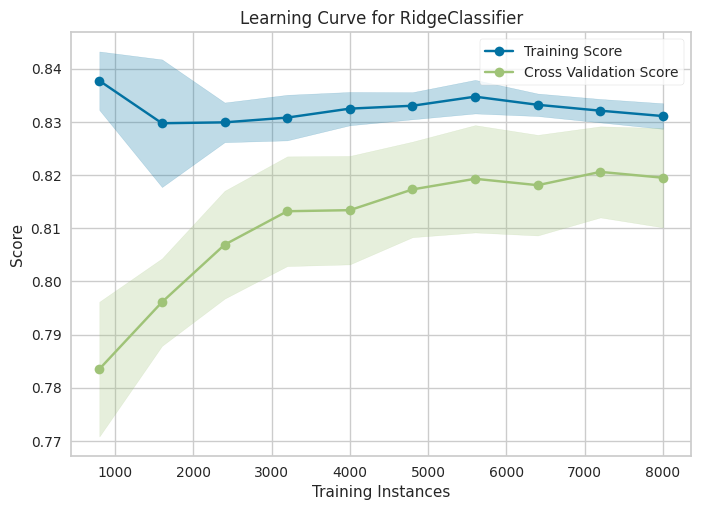

In [152]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

### 1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [153]:
dataset = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.4%20diagnostics/data/diabetes.csv', delimiter=',')[:400]
dataset.head()

dataset.shape

(400, 9)

### 2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               400 non-null    int64  
 1   Glucose                   400 non-null    int64  
 2   BloodPressure             400 non-null    int64  
 3   SkinThickness             400 non-null    int64  
 4   Insulin                   400 non-null    int64  
 5   BMI                       400 non-null    float64
 6   DiabetesPedigreeFunction  400 non-null    float64
 7   Age                       400 non-null    int64  
 8   Outcome                   400 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 28.3 KB


In [155]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


### 3. Отделите целевую переменную Outcome.

In [156]:
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

### 4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [157]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### 5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model_tree = DecisionTreeClassifier(random_state=1)
model_tree.fit(X_train, y_train)

y_pred_test = model_tree.predict(X_test)
y_pred_train = model_tree.predict(X_train)

print(f"F1 train: {f1_score(y_train, y_pred_train)}")
print(f"F1 test: {f1_score(y_test, y_pred_test)}")

F1 train: 1.0
F1 test: 0.6363636363636364


Учитывая метрику f1 модель переобученна, так как идеально описывает тренировочные данные, но плохо тестовые

### 6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

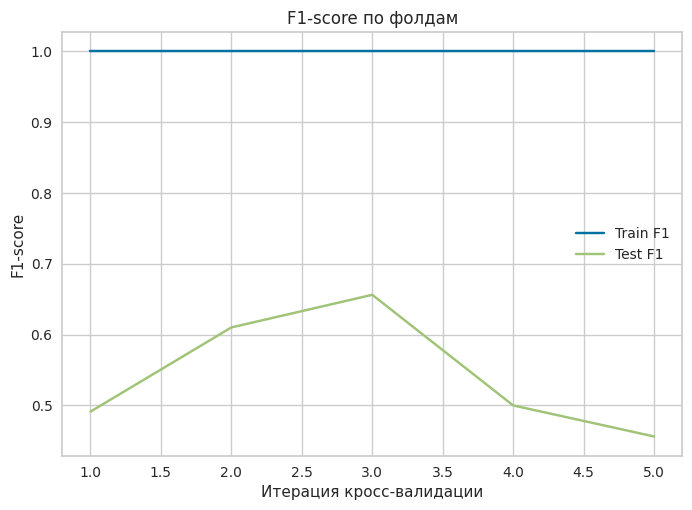

In [159]:
from sklearn.model_selection import cross_validate


cv_results = cross_validate(model_tree, X, y, cv=5, scoring='f1', return_train_score=True)

# Построение графика
plt.plot(range(1, len(cv_results['test_score']) + 1), cv_results['train_score'], label='Train F1')
plt.plot(range(1, len(cv_results['test_score']) + 1), cv_results['test_score'], label='Test F1')
plt.xlabel('Итерация кросс-валидации')
plt.ylabel('F1-score')
plt.title('F1-score по фолдам')
plt.legend()
plt.grid(True)
plt.show()

### 7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

Training score: 0.7375
Test score: 0.7000


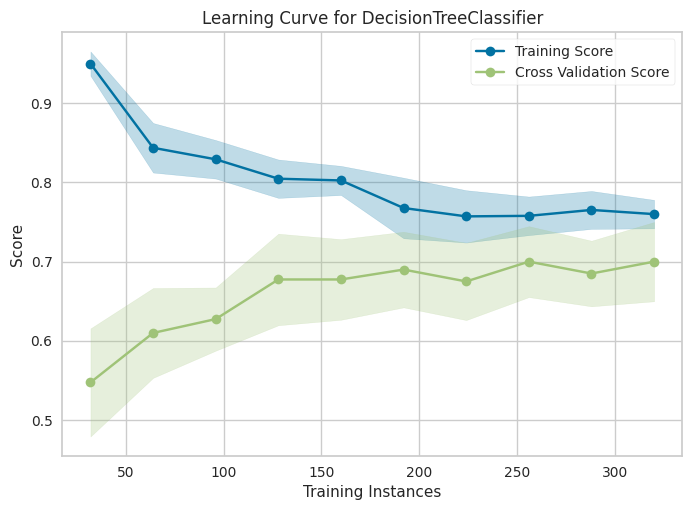

In [160]:
model_tree_depth3 = DecisionTreeClassifier(max_depth=3)

model_tree_depth3.fit(X_train, y_train)

print(f"Training score: {model_tree_depth3.score(X_train, y_train):.4f}")
print(f"Test score: {model_tree_depth3.score(X_test, y_test):.4f}")

visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=3), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

### 8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

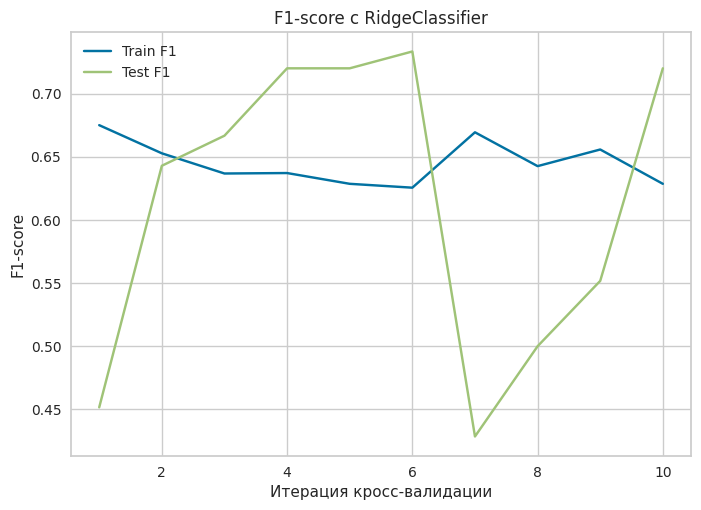

In [161]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier


pipeline = make_pipeline(
    StandardScaler(),
    RidgeClassifier(alpha=1.0)  
)

cv_results = cross_validate(pipeline, X, y, cv=10, scoring='f1', return_train_score=True)

# Построение графика
plt.plot(range(1, len(cv_results['test_score']) + 1), cv_results['train_score'], label='Train F1')
plt.plot(range(1, len(cv_results['test_score']) + 1), cv_results['test_score'], label='Test F1')
plt.xlabel('Итерация кросс-валидации')
plt.ylabel('F1-score')
plt.title('F1-score с RidgeClassifier')
plt.legend()
plt.show()



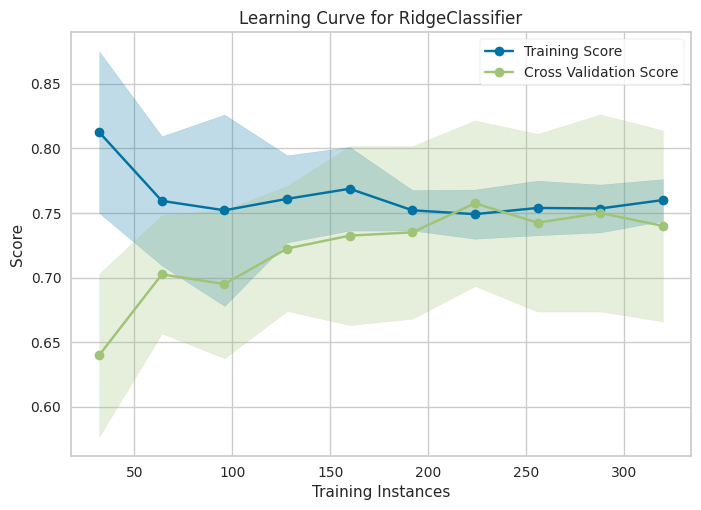

In [162]:
visualizer = LearningCurve(
    pipeline, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

### 9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [163]:
dataset = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.4%20diagnostics/data/diabetes.csv', delimiter=',')

X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

In [164]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"F1 train: {f1_score(y_train, y_pred_train)}")
print(f"F1 test: {f1_score(y_test, y_pred_test)}")

F1 train: 0.6299212598425197
F1 test: 0.6548672566371682


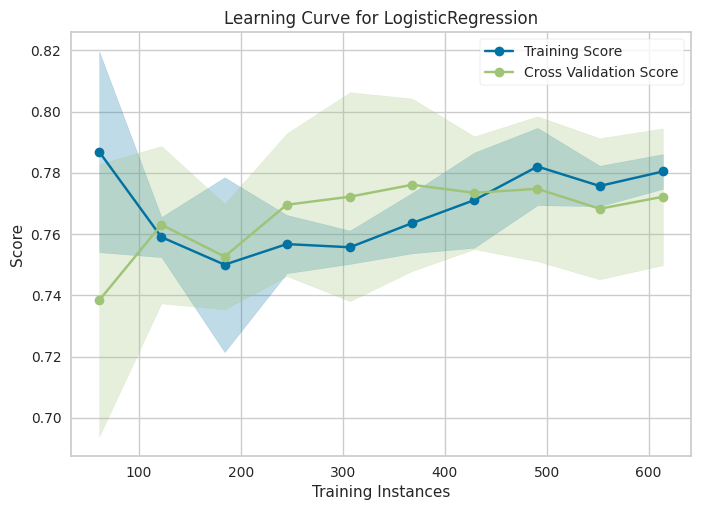

In [166]:
visualizer = LearningCurve(
    LogisticRegression(max_iter=1000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

### 10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model_tree = DecisionTreeClassifier(random_state=1, max_depth=3)
model_tree.fit(X_train, y_train)

y_pred_test = model_tree.predict(X_test)
y_pred_train = model_tree.predict(X_train)

print(f"F1 train: {f1_score(y_train, y_pred_train)}")
print(f"F1 test: {f1_score(y_test, y_pred_test)}")

F1 train: 0.658354114713217
F1 test: 0.6476190476190475


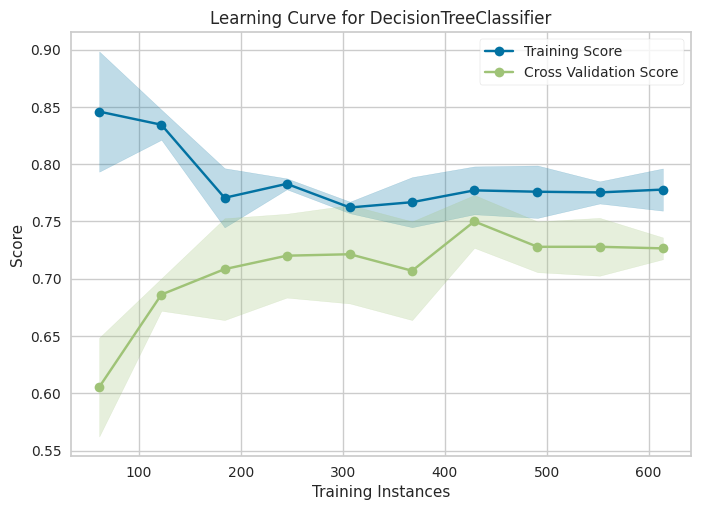

In [168]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1, max_depth=3), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

# Задания для самостоятельной работы

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [171]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


model = LogisticRegression(max_iter=1000)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['precision', 'recall', 'f1']
results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)


for metric in scoring:
    print(f"{metric.capitalize()} (среднее значение): {results[f'test_{metric}'].mean():.3f}")


Precision (среднее значение): 0.878
Recall (среднее значение): 0.858
F1 (среднее значение): 0.868


### 2. Повторите диагностику модели регрессии с использованием других видов моделей

####  I. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

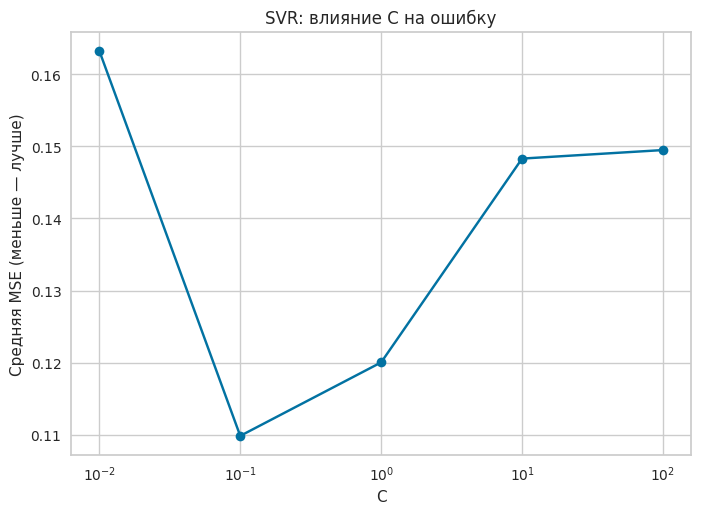

In [172]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Cs = [0.01, 0.1, 1, 10, 100]
svr_scores = []

for c in Cs:
    svr = SVR(C=c)
    scores = cross_val_score(svr, X, y, cv=5, scoring='neg_mean_squared_error')
    svr_scores.append(-scores.mean())

plt.plot(Cs, svr_scores, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Средняя MSE (меньше — лучше)')
plt.title('SVR: влияние C на ошибку')
plt.grid(True)
plt.show()

#### II. метода ближайших соседей (исследуйте влияние количества соседей)

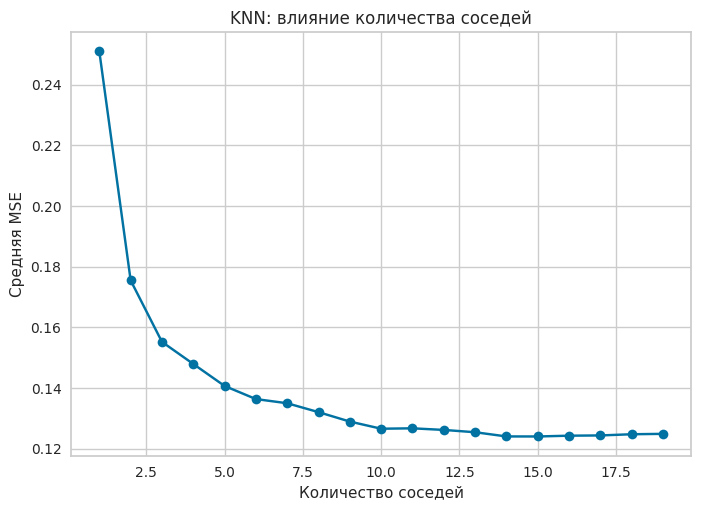

In [173]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = range(1, 20)
knn_scores = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    knn_scores.append(-scores.mean())

plt.plot(neighbors, knn_scores, marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('Средняя MSE')
plt.title('KNN: влияние количества соседей')
plt.grid(True)
plt.show()

#### III. метода решающих деревьев (гиперпараметры по вашему выбору)

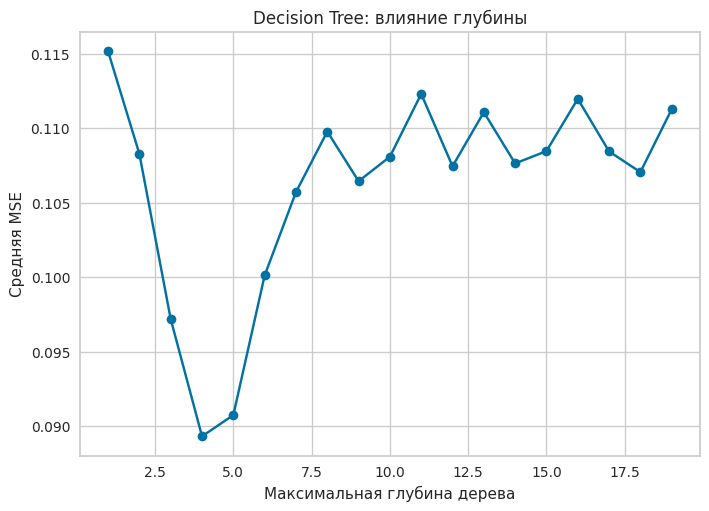

In [174]:
from sklearn.tree import DecisionTreeRegressor

depths = range(1, 20)
tree_scores = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, min_samples_leaf=5)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
    tree_scores.append(-scores.mean())

plt.plot(depths, tree_scores, marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Средняя MSE')
plt.title('Decision Tree: влияние глубины')
plt.grid(True)
plt.show()

### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

Нет актуальной ссылки на датасет

### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

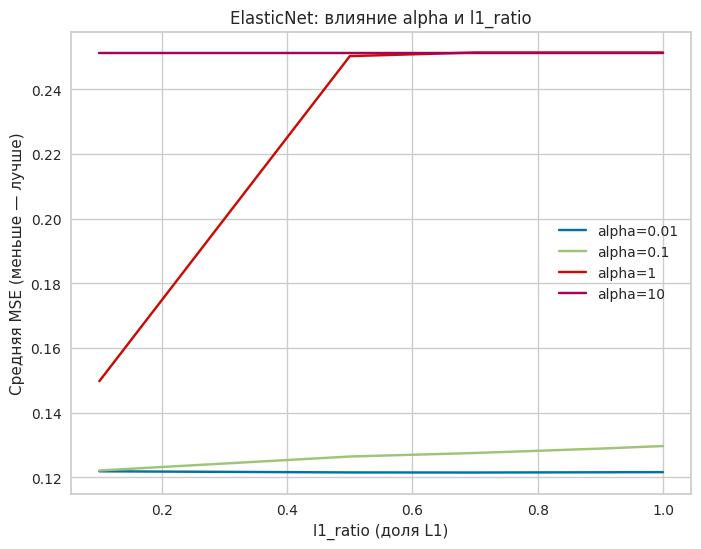

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.7, 0.9, 1.0]

results = np.zeros((len(alphas), len(l1_ratios)))

for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        results[i, j] = -score.mean()  # MSE

plt.figure(figsize=(8, 6))
for i, alpha in enumerate(alphas):
    plt.plot(l1_ratios, results[i], label=f'alpha={alpha}')
    
plt.xlabel('l1_ratio (доля L1)')
plt.ylabel('Средняя MSE (меньше — лучше)')
plt.title('ElasticNet: влияние alpha и l1_ratio')
plt.legend()
plt.grid(True)
plt.show()


В данном примере чем больше доля L1 и alpha, тем хуже результаты

### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

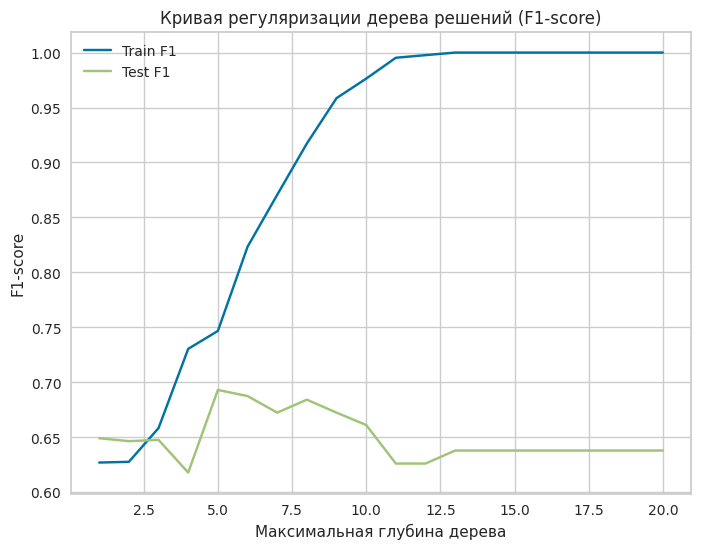

Оптимальная глубина дерева: 5
F1-score на всём датасете: 0.9312820512820512


In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


depths = range(1, 21)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=1)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_scores.append(f1_score(y_train, y_train_pred))
    test_scores.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(depths, train_scores, label='Train F1')
plt.plot(depths, test_scores, label='Test F1')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('F1-score')
plt.title('Кривая регуляризации дерева решений (F1-score)')
plt.legend()
plt.grid(True)
plt.show()

optimal_depth = depths[np.argmax(test_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth}")

final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=1)
final_model.fit(X, y)
y_all_pred = final_model.predict(X)
print("F1-score на всём датасете:", f1_score(y, y_all_pred))

# Контрольные вопросы

### Что такое обобщающая способность модели?
Способность модели точно предсказывать на новых, невиденных данных (не только на обучающих).

### Что такое переобучение модели?
Ситуация, когда модель слишком хорошо запоминает обучающую выборку, но плохо работает на новых данных.

### Способы борьбы с переобучением:
- Регуляризация (L1, L2)
- Уменьшение сложности модели (например, глубины дерева)
- Использование больше данных
- Раннее завершение обучения (early stopping)
- Кросс-валидация

### Что такое регуляризация модели?
Метод добавления штрафа за сложность модели в функцию потерь, чтобы предотвратить переобучение.

### Различия между методами регуляризации:
- **L1 (Lasso):** отбрасывает ненужные признаки (коэффициенты → 0)
- **L2 (Ridge):** просто уменьшает значения коэффициентов
- **ElasticNet:** комбинация L1 и L2

### Что такое недообучение модели?
Ситуация, когда модель слишком простая и не может уловить закономерности в данных.

### Способы борьбы с недообучением:
- Увеличение сложности модели
- Увеличение числа признаков
- Увеличение времени обучения
- Снижение регуляризации
